# CAROLINA COLINA ZAMORANO

# PRÁCTICA 2 - INTRODUCCIÓN A NETWORK

## 1.1. CREAR LA RED NO DIRIGIDA

In [169]:
import networkx as nx

In [170]:
G = nx.DiGraph()

In [171]:
G.clear()

In [172]:
G.add_nodes_from(range(1,11))

In [173]:
list(G.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [174]:
#G.add_edges_from([(1,2),(1,3),(2,1),(2,3),(3,6),(4,5),(4,6),(4,8),(4,9),(5,4),(5,6),(5,8),(5,9),(6,3),(6,4),(6,5),(6,7),(6,8),(7,10),(8,4),(8,5),(8,6),(9,4),(9,5),()])
G.add_edges_from([(1,2),(1,3),(2,3),(3,6),(4,5),(4,6),(4,8),(4,9),(5,6),(5,8),(5,9),(6,7),(6,8),(7,10),(8,6)])

In [175]:
list(G.edges())

[(1, 2),
 (1, 3),
 (2, 3),
 (3, 6),
 (4, 5),
 (4, 6),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (7, 10),
 (8, 6)]

## 1.2. CALCULAR EL NÚMERO DE NODOS Y DE ENLACES

In [176]:
G.number_of_nodes()

10

In [177]:
G.number_of_edges()

15

## 1.3. Añadir a la red los siguientes atributos tipo string: (nombre=red1), (tipo=no-dirigida)

In [178]:
G.graph['nombre']='red1'
G.graph['tipo']='no-dirigida'
G.graph

{'nombre': 'red1', 'tipo': 'no-dirigida'}

## 1.4. Visualizar la red

In [179]:
%matplotlib inline

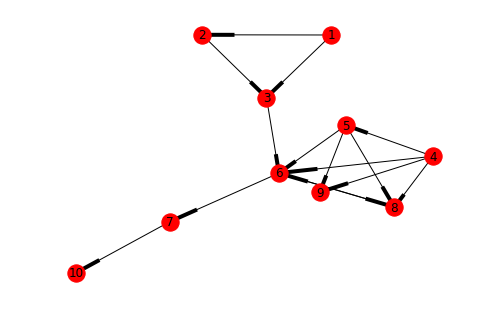

In [180]:
pos=nx.layout.kamada_kawai_layout(G)
nx.draw(G,pos,with_labels=True)

## 1.5. Dado un nodo U, e.g. U=6, calcular los vecinos del nodo.

In [181]:
list(G.neighbors(2))

[3]

## 1.6. Cambiar el color del nodo U y todos sus enlaces

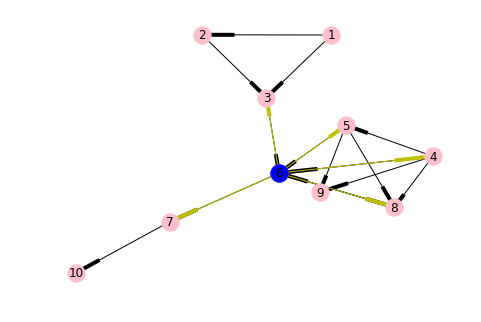

In [182]:
pos=nx.layout.kamada_kawai_layout(G)
nx.draw(G,pos=pos,with_labels=True, node_color='pink',edge_color='black')
nx.draw_networkx_nodes(G,pos,nodelist=[6],node_color='b')
nx.draw_networkx_edges(G,pos,edgelist=[(6,3),(6,4),(6,5),(6,7),(6,8)],edge_color='y')

# 2. TRABAJAR CON ATRIBUTOS DE UNA RED

## 2.1. A la red anterior, añadir un atributo ‘peso’ a cada enlace creado de acuerdo a una distribución uniforme discreta [1,10]

In [183]:
G.add_edges_from([(1,2,{'peso':1}),(1,3,{'peso':2}),(2,3,{'peso':3}),(3,6,{'peso':5}),(4,5,{'peso':4}),(4,6,{'peso':7}),(4,8,{'peso':9}),(4,9,{'peso':6}),(5,6,{'peso':8}),(5,8,{'peso':10}),(5,9,{'peso':3}),(6,7,{'peso':5}),(6,8,{'peso':2}),(7,10,{'peso':4}),(8,6,{'peso':7})])

In [184]:
list(G.edges(data=True))

[(1, 2, {'peso': 1}),
 (1, 3, {'peso': 2}),
 (2, 3, {'peso': 3}),
 (3, 6, {'peso': 5}),
 (4, 5, {'peso': 4}),
 (4, 6, {'peso': 7}),
 (4, 8, {'peso': 9}),
 (4, 9, {'peso': 6}),
 (5, 6, {'peso': 8}),
 (5, 8, {'peso': 10}),
 (5, 9, {'peso': 3}),
 (6, 7, {'peso': 5}),
 (6, 8, {'peso': 2}),
 (7, 10, {'peso': 4}),
 (8, 6, {'peso': 7})]

## 2.2. Mostrar todos los enlaces con peso mayor que un umbral W

In [185]:
# Enlaces con pesos mayores que 5
[(e[0],e[1]) for e in G.edges(data=True) if e[2]['peso']>5]

[(4, 6), (4, 8), (4, 9), (5, 6), (5, 8), (8, 6)]

## 2.3. Mostrar la distribución de pesos ordenada de menor a mayor.

## 2.4. Calcular el grado

In [200]:
# G.degree()
nx.degree(G)

DiDegreeView({1: 2, 2: 2, 3: 3, 4: 4, 5: 4, 6: 6, 7: 2, 8: 4, 9: 2, 10: 1})

## 2.5. Calcular los tres nodos con mayor grado

In [265]:
g1 = 0
g2 = 0
g3 = 0
n = 1
numNodos = G.number_of_nodes()

while n < numNodos:
    grado = G.degree(n)
    if grado > g1:
        g1 = grado
        n1 = n
    elif grado > g2:
        g2 = grado
        n2 = n
    elif grado > g3:
        g3 = grado
        n3 = n
    n = n + 1

print ("Los nodos con mayor grado son:")
print (n1,n2,n3)


Los nodos con mayor grado son:
6 5 8


## 2.6. Visualizar la red utilizando un layout kamada_kawai, con las etiquetas de los nodos, siendo el tamaño de los nodos proporcional a su valor de su grado

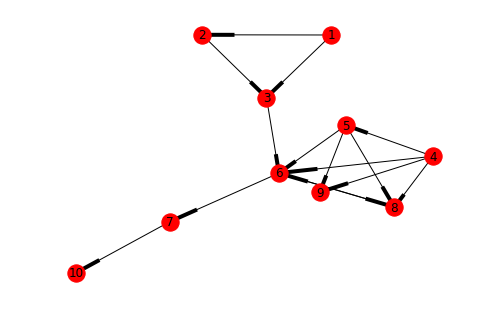

In [187]:
pos=nx.layout.kamada_kawai_layout(G)
nx.draw(G,pos=pos,with_labels=True)

## 2.7. En la visualización anterior, cambiar el color de los 3 nodos de mayor grado

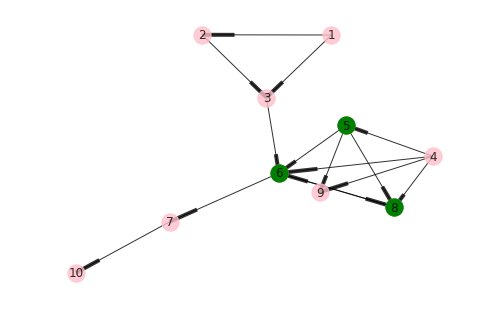

In [259]:
pos=nx.layout.kamada_kawai_layout(G)
nx.draw(G,pos=pos,with_labels=True, node_color='pink',edge_color='black',alpha=0.8)
nx.draw_networkx_nodes(G,pos,nodelist=[n1, n2, n3],node_color='green')

# 3. IMPORTAR UNA RED

## 3.1. Importar la red social del club de karate Zachary

In [188]:
import networkx as zc
import numpy as nmp
%matplotlib inline

In [189]:
K = zc.karate_club_graph()

## 3.2. Calcular el número de nodos y el número de enlaces

In [190]:
print ('Número de nodos %i' % K.number_of_nodes())
print ('Número de enlaces %i' % K.number_of_edges())

Número de nodos 34
Número de enlaces 78


## 3.3. Visualizar la red utilizando el layout que considere oportuno, con las etiquetas de los nodos, siendo el tamaño de los nodos proporcional a su valor de grado

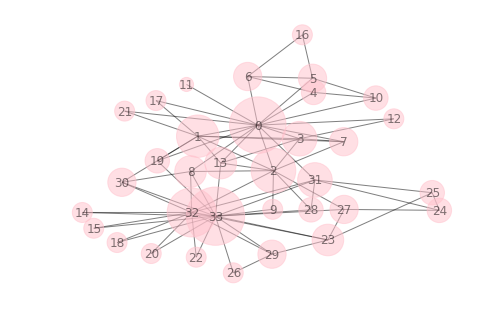

In [191]:
posicion=zc.layout.kamada_kawai_layout(K)
k=nmp.array([k[1] for k in K.degree()])
zc.draw(K,pos=posicion,with_labels=True, node_color='pink',alpha=0.5, node_size=k*200)